<a href="https://colab.research.google.com/github/gamecicn/TF2_Study/blob/KaggleCrowdFlowerSearch/T2E3_Kaggle_CrossFlower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Crowdflower Search Results Relevance

https://www.kaggle.com/c/crowdflower-search-relevance/overview

In [8]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:

# Download Data
csv_train_file = '/content/drive/MyDrive/DS_data/KaggleCrowdFlowerSearch/train.csv'
csv_test_file = '/content/drive/MyDrive/DS_data/KaggleCrowdFlowerSearch/test.csv'

df_data = pd.read_csv(csv_train_file)
df_test = pd.read_csv(csv_test_file)

df_data.head()

,id,query,product_title,product_description,median_relevance,relevance_variance
0,1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1,0.000
1,2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4,0.000
2,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,NaN,4,0.471
3,5,wine rack,Concept Housewares WR-44526 Solid-Wood Ceiling...,"Like a silent and sturdy tree, the Southern En...",4,0.000
4,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",2,0.471


In [7]:
df_test.head()

,id,query,product_title,product_description
0,3,electric griddle,Star-Max 48 in Electric Griddle,NaN
1,6,phillips coffee maker,Philips SENSEO HD7810 WHITE Single Serve Pod C...,NaN
2,9,san francisco 49ers,2013 San Francisco 49ers Clock,A 2013 San Francisco 49ers clock is the ultima...
3,11,aveeno shampoo,AVEENO 10.5FLOZ NRSH SHINE SH,"Water, Ammonium Lauryl Sulfate, Dimethicone, S..."
4,12,flea and tick control for dogs,Merial Frontline Plus Flea and Tick Control fo...,NaN


In [6]:
# Split train data to train and valid dataset
df_data_copy = df_data.copy()

df_train  = df_data_copy.sample(frac=0.995, random_state=0)
df_valid = df_data_copy.drop(df_train.index)

print("lenght of train is {}".format(len(df_train)))
print("lenght of valid is {}".format(len(df_valid)))
print("lenght of test is {}".format(len(df_test)))

df_train_labels = df_train.pop('median_relevance')
df_valid_labels = df_valid.pop('median_relevance')

lenght of train is 10107
lenght of valid is 51
lenght of test is 22513


## EDA

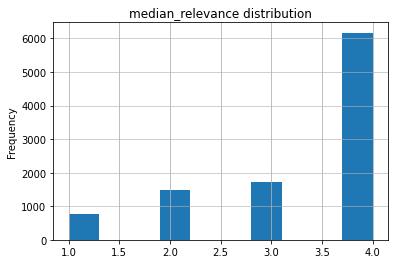

In [12]:
df_data['median_relevance'].plot.hist(grid=True)
plt.title('median_relevance distribution')
plt.grid(axis='y', alpha=0.75)

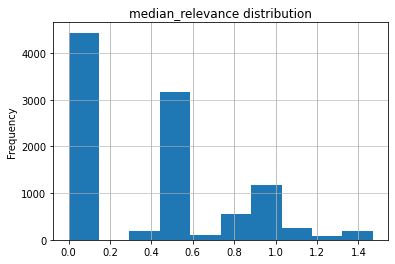

In [13]:
df_data['relevance_variance'].plot.hist(grid=True)
plt.title('median_relevance distribution')
plt.grid(axis='y', alpha=0.75)

## Feature Extraction

In [15]:
def feat_query_in_title(row):
  try:
    return 1 if row['product_title'].lower().find(row['query'].lower()) > -1 else 0 
  except:
    return 0

def feat_query_in_description(row):
  try:
    return 1 if row['product_description'].lower().find(row['query'].lower()) > -1 else 0 
  except:
    return 0 

In [16]:
df_data['feat_query_in_title'] = df_data.apply (lambda row: feat_query_in_title(row), axis=1)
df_data['feat_query_in_desc']  = df_data.apply (lambda row: feat_query_in_description(row), axis=1)

In [25]:
df_test['feat_query_in_title'] = df_test.apply (lambda row: feat_query_in_title(row), axis=1)
df_test['feat_query_in_desc']  = df_test.apply (lambda row: feat_query_in_description(row), axis=1)

In [17]:
df_data.head()

,id,query,product_title,product_description,median_relevance,relevance_variance,feat_query_in_title,feat_query_in_desc
0,1,bridal shower decorations,Accent Pillow with Heart Design - Red/Black,Red satin accent pillow embroidered with a hea...,1,0.000,0,0
1,2,led christmas lights,Set of 10 Battery Operated Multi LED Train Chr...,Set of 10 Battery Operated Train Christmas Lig...,4,0.000,0,0
2,4,projector,ViewSonic Pro8200 DLP Multimedia Projector,NaN,4,0.471,1,0
3,5,wine rack,Concept Housewares WR-44526 Solid-Wood Ceiling...,"Like a silent and sturdy tree, the Southern En...",4,0.000,1,0
4,7,light bulb,Wintergreen Lighting Christmas LED Light Bulb ...,"WTGR1011\nFeatures\nNickel base, 60,000 averag...",2,0.471,1,1


In [23]:
df_data[["feat_query_in_title", 'feat_query_in_title']]

,feat_query_in_title,feat_query_in_title
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
10153,0,0
10154,0,0
10155,0,0
10156,0,0


## Build Model

In [24]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanAbsoluteError())

history = model.fit(df_data[["feat_query_in_title", 'feat_query_in_title']].to_numpy(), 
                    df_data["median_relevance"],
                    epochs=10)

Epoch 1/10
318/318 [==============================] - 1s 854us/step - loss: 3.1357
Epoch 2/10
318/318 [==============================] - 0s 884us/step - loss: 2.2237
Epoch 3/10
318/318 [==============================] - 0s 864us/step - loss: 1.3132
Epoch 4/10
318/318 [==============================] - 0s 880us/step - loss: 1.0641
Epoch 5/10
318/318 [==============================] - 0s 868us/step - loss: 0.9761
Epoch 6/10
318/318 [==============================] - 0s 838us/step - loss: 0.8907
Epoch 7/10
318/318 [==============================] - 0s 873us/step - loss: 0.8014
Epoch 8/10
318/318 [==============================] - 0s 877us/step - loss: 0.7455
Epoch 9/10
318/318 [==============================] - 0s 852us/step - loss: 0.7398
Epoch 10/10
318/318 [==============================] - 0s 831us/step - loss: 0.7420


## Predict 

In [26]:

#probability_model = tf.keras.Sequential([model, 
#                                         tf.keras.layers.Softmax()]
probability_model = model

predictions = probability_model.predict(df_test[["feat_query_in_title", 'feat_query_in_title']].to_numpy())



In [40]:
res = pd.DataFrame(data = {"id" : df_test['id'] , 
                           "prediction" : [int(np.round(x[0])) for x in predictions]})

res.head()

res.to_csv("/content/drive/MyDrive/output/Kaggle_CrossFlower_Init1.csv", index=False)